In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Observations:-
    1. There are two columns of object data type in dataset.

In [5]:
df['Country'].value_counts()
df['Region'].value_counts()
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Region']=LE.fit_transform(df['Region'])
df['Region'].value_counts()
df['Country'].value_counts()
df.drop('Country', axis=1,inplace=True)

In [6]:
df.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    int32  
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(1), int64(1)
memory usage: 13.1 KB


# Summary Statistics

In [8]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations :-
    
    1. Mean is more than median for Happiness Rank, Happiness Score, Standard Error, Trust, Generosity and Dystopia Residual


# Exploring Data Variable

In [9]:
df['Happiness Score'].value_counts()

5.192    2
4.642    1
5.098    1
5.129    1
5.889    1
        ..
4.252    1
4.633    1
3.931    1
7.200    1
6.750    1
Name: Happiness Score, Length: 157, dtype: int64

# Data Visualizations

To check missing values

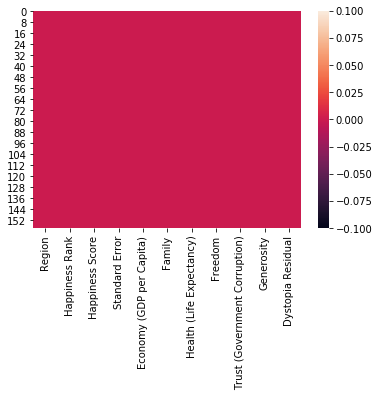

In [10]:
sns.heatmap(df.isnull())

Observations:-
    
    1. There is no missing values in the dataset.

# Univariate Analysis

In [11]:
df['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

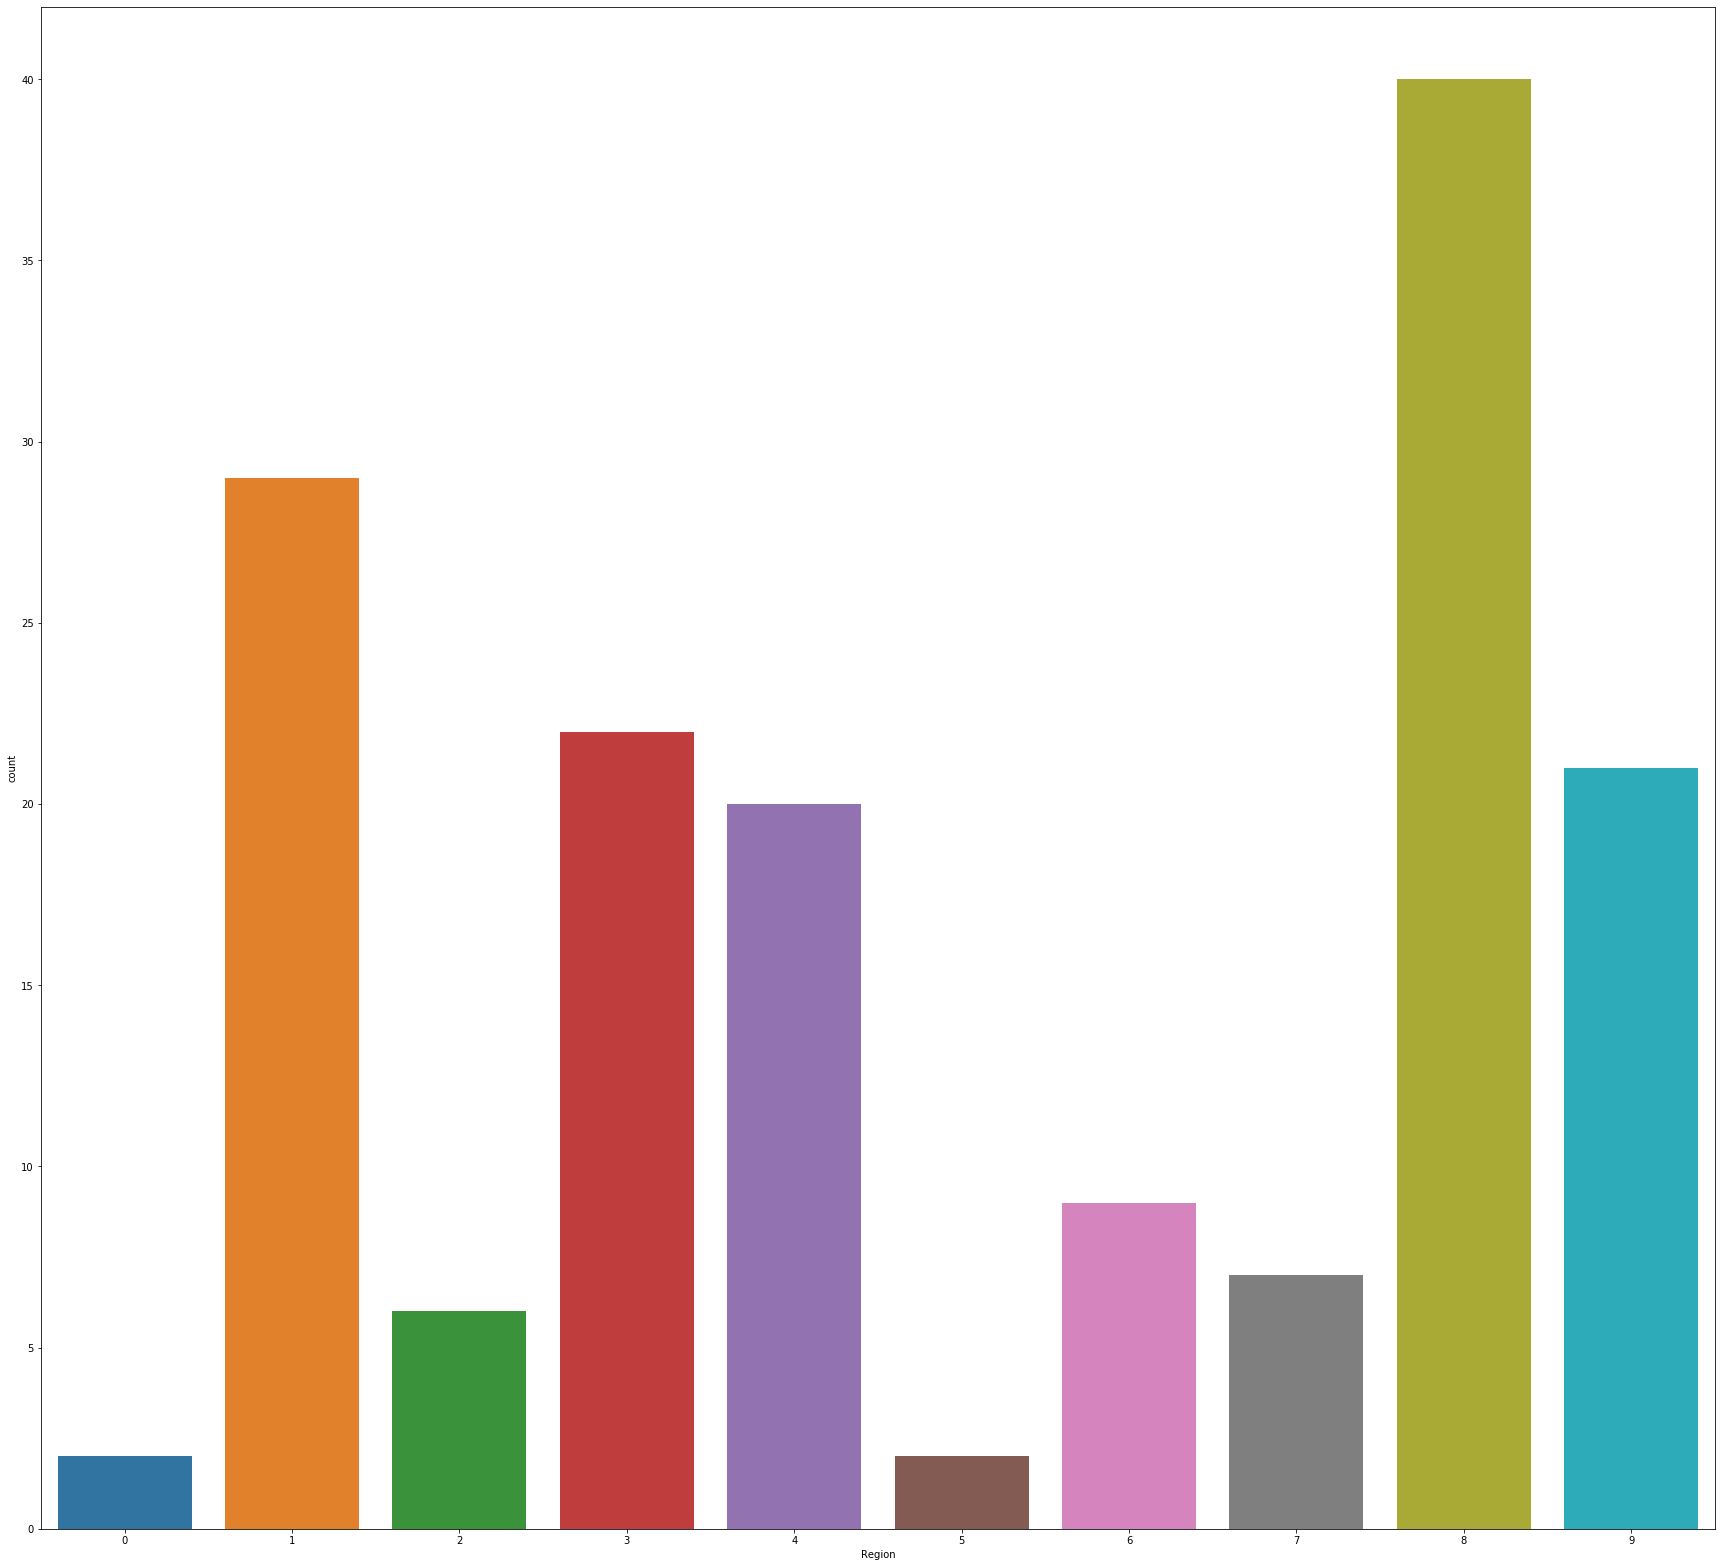

In [12]:
plt.figure(figsize=(30,28))
sns.countplot(df['Region'])

Observations:-
    
1. Countries of Sub-Saharan Africa region are in maximum quantity in dataset.
2. Countries of North America and Australia and New Zealand region are in minimum quantity in dataset.

# To check correlation

In [13]:
dfcor=df.corr()
dfcor

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


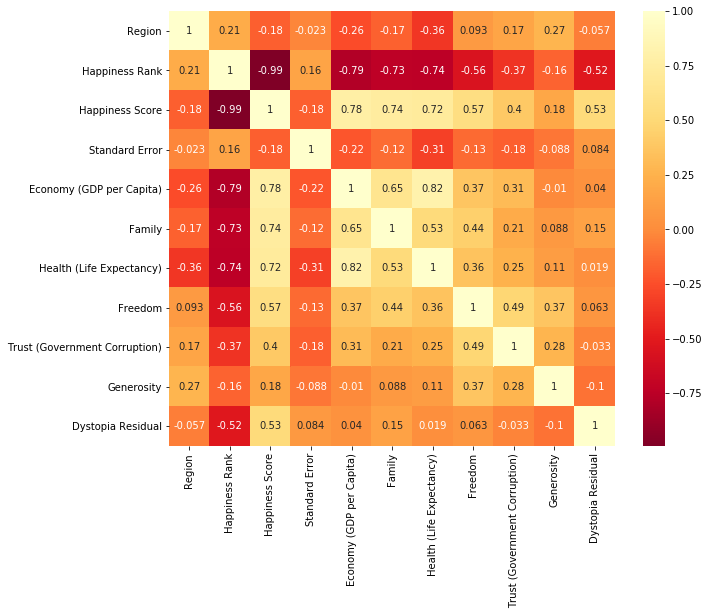

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:-
    
    1. Happiness Score is highly positively correlated with Economy (GDP per Capita).
    2. Economy (GDP per Capita) is highly negatively correlated with Happiness Rank .
    3. Happiness Rank is highly positively correlated with Region.
    4. Happiness Rank is highly negatively correlated with Happiness Score.
   

# Bivariate Analysis

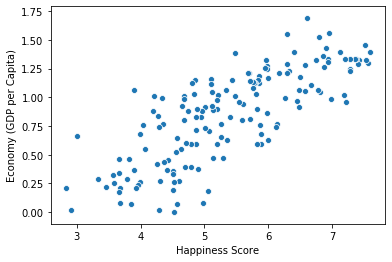

In [15]:
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

Observations:-
    
1. Happiness Score is positively correlated with Economy (GDP per Capita).

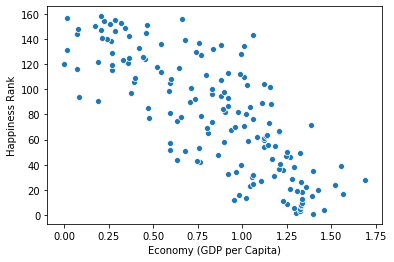

In [16]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Rank',data=df)

Observations:-
    
1. Economy (GDP per Capita) is negatively correlated with Happiness Rank .

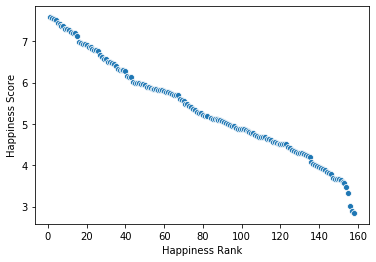

In [17]:
sns.scatterplot(x='Happiness Rank',y='Happiness Score',data=df)

Observations:-
    
1. Happiness Rank is negatively correlated with Happiness Score .

# Plotting Outliers

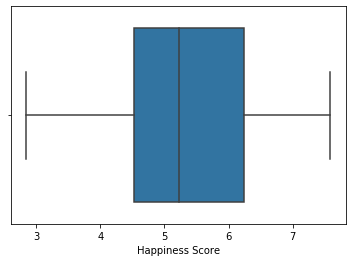

In [18]:
sns.boxplot(df['Happiness Score'])

Observations:-
    
1. There is no outlier in Happiness Score.

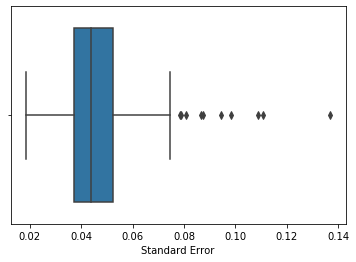

In [19]:
sns.boxplot(df['Standard Error'])

Observations:-
    
1. Outliers are present in Standard Error.

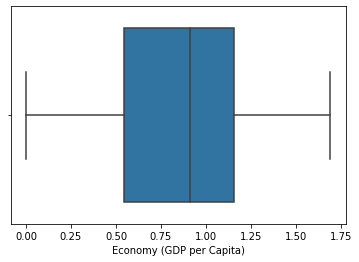

In [20]:
sns.boxplot(df['Economy (GDP per Capita)'])

In [21]:
Observations:-
    
1. There is no outlier in Economy (GDP per Capita).

SyntaxError: invalid syntax (<ipython-input-21-b3a8d8269989>, line 1)

In [ ]:
sns.boxplot(df['Family'])

Observations:-
    
1. Outliers are present in Family.

In [ ]:
sns.boxplot(df['Health (Life Expectancy)'])

Observations:-
    
1. There is no outlier in Health (Life Expectancy).

In [ ]:
sns.boxplot(df['Freedom'])

Observations:-
    
1. There is no outlier in Freedom.

In [ ]:
sns.boxplot(df['Trust (Government Corruption)'])

Observations:-
    
1. Outliers are present in Trust (Government Corruption).

In [ ]:
sns.boxplot(df['Generosity'])

In [ ]:
sns.boxplot(df['Dystopia Residual'])

Observations:-
    
1. Outliers are present in Dystopia Residual.

In [ ]:
sns.boxplot(df['Happiness Rank'])

Observations:-
    
1. There is no outlier in Happiness Rank.

Observations :-
    
    1. Outliers are present in Dystopia Residual, Generosity, Trust (Government Corruption), Family and Standard Error.

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df_new=df[(z<3).all(axis=1)]

In [ ]:
df.shape

In [ ]:
df_new.shape

In [ ]:
# 9 rows are removed as outliers.

In [ ]:
(9/50)

In [ ]:
df=df_new

# To Check Skewness

In [ ]:
sns.distplot(df['Region'])

Observations :-
    
1. Region column is not highly skewed.

In [ ]:
sns.distplot(df['Happiness Rank'])

Observations :-
    
1. Happiness Rank column is not highly skewed.

In [ ]:
sns.distplot(df['Happiness Score'])

Observations :-
    
1. Happiness Rank column is not highly skewed.

In [ ]:
sns.distplot(df['Standard Error'])

Observations :-
    
1. Standard Error is right skewed.

In [ ]:
sns.distplot(df['Economy (GDP per Capita)'])

Observations :-
    
1. Economy (GDP per Capita) column is not highly skewed.

In [ ]:
sns.distplot(df['Family'])

Observations :-
    
1. Family column is left skewed.

In [ ]:
sns.distplot(df['Health (Life Expectancy)'])

Observations :-
    
1. Health (Life Expectancy)  column is left skewed.

In [ ]:
sns.distplot(df['Freedom'])

Observations :-
    
1. Freedom column is not highly skewed.

In [ ]:
sns.distplot(df['Trust (Government Corruption)'])

Observations :-
    
1. Trust (Government Corruption) column is right skewed.

In [ ]:
sns.distplot(df['Generosity'])

Observations :-
    
1. Generosity column is right skewed.

In [ ]:
sns.distplot(df['Dystopia Residual'])

Observations :-
    
1. Dystopia Residual column is not highly skewed.

In [ ]:
df.skew()

Observations :-
    
    1. Generosity, Trust (Government Corruption), Health (Life Expectancy), Family and Standard Error are highly skewed.

In [ ]:
np.log(df['Generosity'])

In [ ]:
df['Generosity']=df['Generosity'].skew()

from logarithm the value is 0.654710175684522

--And then Using sqrt after log---

In [ ]:
np.sqrt(df['Generosity'])

In [ ]:
df['Generosity']=df['Generosity'].skew()
df['Generosity'].skew()

from sqrt the value is 0.

In [ ]:
np.log(df['Trust (Government Corruption)'])

In [ ]:
df['Trust (Government Corruption)']=df['Trust (Government Corruption)'].skew()

Using log, the value for Trust (Government Corruption) is 1.2725295316569558


--And then Using sqrt after log---

In [ ]:
np.sqrt(df['Trust (Government Corruption)'])

In [ ]:
df['Trust (Government Corruption)']=df['Trust (Government Corruption)'].skew()
df['Trust (Government Corruption)'].skew()

In [ ]:
np.log(df['Standard Error'])

In [ ]:
df['Standard Error']=df['Standard Error'].skew()

--And then Using sqrt after log---

In [ ]:
np.sqrt(df['Standard Error'])

In [ ]:
df['Standard Error']=df['Standard Error'].skew()
df['Standard Error'].skew()

In [ ]:
np.cbrt(df['Health (Life Expectancy)'])

In [ ]:
df['Health (Life Expectancy)']=df['Health (Life Expectancy)'].skew()

Using cbrt, the value for Health (Life Expectancy) is -0.7477111512652197

--And then Using square after cuberoot---

In [ ]:
np.square(df['Health (Life Expectancy)'])

In [ ]:
df['Health (Life Expectancy)']=df['Health (Life Expectancy)'].skew()
df['Health (Life Expectancy)'].skew()

In [ ]:
np.cbrt(df['Family'])

In [ ]:
df['Family']=df['Family'].skew()

Using cbrt, the value for Health (Life Expectancy) is -0.811340231661161

--And then Using square after cuberoot---

In [ ]:
np.square(df['Family'])

In [ ]:
df['Family']=df['Family'].skew()
df['Family'].skew()

In [ ]:
df.skew()

In [ ]:
df.head()

In [ ]:
df_1=df['Happiness Score']
df_1.head()

In [ ]:
df.drop('Happiness Score',axis=1,inplace=True)
df.head()

In [ ]:
x=df.iloc[:,0:]

In [ ]:
df.insert(10,'Happiness Score',df_1)
df.head()

In [ ]:
x=df.iloc[:,0:-1]
x.head()

In [ ]:
y=df.iloc[:,-1]
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

We will use 26 as random state

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=26)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
lm.coef_                                                                               

In [ ]:
lm.intercept_

In [ ]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [ ]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred=rd.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


In [ ]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
pred=el.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


As per above steps, Ridge Regression is the best algorithm.

# Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

In [ ]:
rdscores=cross_val_score(rd,x,y,cv=5)
print(rdscores)
print(rdscores.mean(),rdscores.std())

In [ ]:
lsscores=cross_val_score(ls,x,y,cv=5)
print(lsscores)
print(lsscores.mean(),lsscores.std())

In [ ]:
elscores=cross_val_score(el,x,y,cv=5)
print(elscores)
print(elscores.mean(),elscores.std())

In [ ]:
list1=[0.993909749038073,0.9939097649221135,0.9939049618752898,0.9939083706199244]
list2=[0.47578592604317976,0.4757940369814255,0.47581859882803956,0.4762823115306734]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)


As per the accuracy scores, Ridge Regression was the best algorithm.
And the difference between CV and Accuracy Score of Ridge Regression is only 0.5181157279406879.
So, Ridge Regression is the best algorithm here.

# Saving the best model

In [ ]:
import joblib

In [ ]:
joblib.dump(rd,"rdhappiness_score.obj")